In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics

# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Import data

In [17]:
data = pd.read_csv('GameData_backup_with_review.csv' ,low_memory=0, header=0 , keep_default_na=False , encoding='ANSI')

# Spliting data into Feature and
#,'18+','Casual' , 'Indie', 'Free To Play', 'RPG' , 'Strategy' ,'Sports', 'Simulation'  , 'Racing','Massivley Multiplayer' ,'Act_Adv'
X=data[['positive', 'price', 'total_lang','18+','Casual' , 'Indie', 'Free to Play', 'RPG' , 'Strategy' ,'Sports', 'Simulation'  , 'Racing','Massively Multiplayer' ,'Act_Adv']]
y=data['owner_cat']

In [3]:
y

0         7
1         8
2         9
3        12
4         8
         ..
41270     0
41271     2
41272     0
41273     0
41274     0
Name: owner_cat, Length: 41275, dtype: int64

# Split data to 7:3

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)  # 70% training and 30% test


print('X Train', X_train.shape)
print('X Test', X_test.shape)

print('Y Train', y_train.shape)
print('Y Test', y_test.shape)

X Train (28892, 14)
X Test (12383, 14)
Y Train (28892,)
Y Test (12383,)


# MLP 

# Init Model

In [5]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6),
                    learning_rate_init=0.001,
                    solver="adam",
                    activation='relu')

# Fit data onto the model
model = clf.fit(X_train,y_train)

print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


C:\Users\antho\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Classification Report

In [6]:
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8460
           1       0.45      0.48      0.46       511
           2       0.38      0.27      0.32      1632
           3       0.29      0.39      0.33       776
           4       0.00      0.00      0.00       222
           5       0.31      0.08      0.13       545
           6       0.00      0.00      0.00       129
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        82
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.00      1.00      0.01         1
          12       0.00      0.00      0.00         1

    accuracy                           0.73     12383
   macro avg       0.18      0.24      0.17     12383
weighted avg       0.69      0.73      0.71     12383



C:\Users\antho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix 

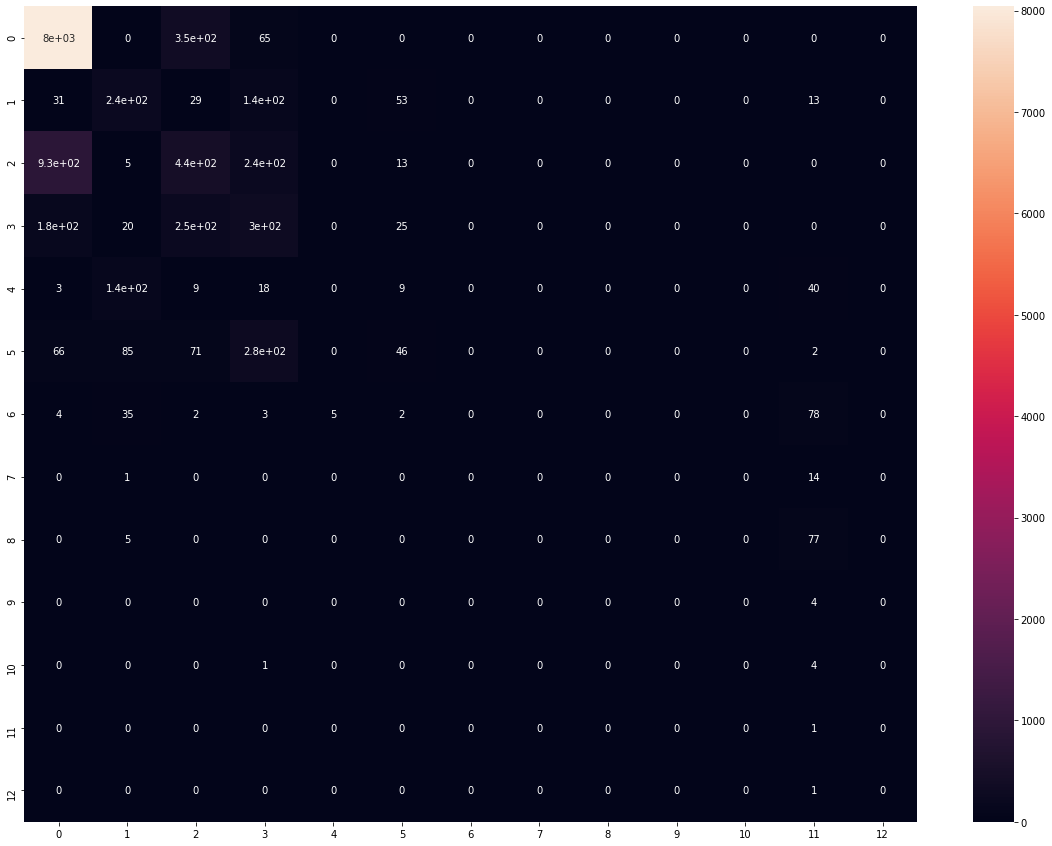

In [7]:
import seaborn as sns

f = plt.figure(figsize=(20,15))
sns.heatmap(metrics.confusion_matrix(expected_y, predicted_y),  annot=True)

# Test remove owner_cat: 0 

In [20]:
#remove Cat = 0
data_rmv_cat0 = data[data.owner_cat > 0]

# Spliting data into Feature and
#,'18+','Casual' , 'Indie', 'Free To Play', 'RPG' , 'Strategy' ,'Sports', 'Simulation'  , 'Racing','Massivley Multiplayer' ,'Act_Adv'
X_cat0 = data_rmv_cat0[['positive', 'price', 'total_lang','18+','Casual' , 'Indie', 'Free to Play', 'RPG' , 'Strategy' ,'Sports', 'Simulation'  , 'Racing','Massively Multiplayer' ,'Act_Adv']]
y_cat0 = data_rmv_cat0['owner_cat']

# Split dataset into training set and test set
X_cat0_train, X_cat0_test, y_cat0_train, y_cat0_test = train_test_split(X_cat0, y_cat0, test_size=0.3, random_state=45)  # 70% training and 30% test


print('X Train', X_cat0_train.shape)
print('X Test', X_cat0_test.shape)

print('Y Train', y_cat0_train.shape)
print('Y Test', y_cat0_test.shape)

# Create model object
clf_cat0 = MLPClassifier(hidden_layer_sizes=(6),
                    learning_rate_init=0.01,
                    solver="adam",
                    activation='relu')

# Fit data onto the model
model_cat0 = clf_cat0.fit(X_cat0_train,y_cat0_train)

expected_cat0_y  = y_cat0_test
predicted_cat0_y = model_cat0.predict(X_cat0_test)

X Train (9142, 14)
X Test (3919, 14)
Y Train (9142,)
Y Test (3919,)


In [21]:
print(metrics.classification_report(expected_cat0_y, predicted_cat0_y))

              precision    recall  f1-score   support

           1       0.29      0.31      0.30       547
           2       0.53      0.99      0.69      1565
           3       0.26      0.01      0.01       800
           4       0.00      0.00      0.00       219
           5       0.28      0.21      0.24       536
           6       0.00      0.00      0.00       124
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        96
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1

    accuracy                           0.47      3919
   macro avg       0.11      0.13      0.10      3919
weighted avg       0.34      0.47      0.35      3919



C:\Users\antho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


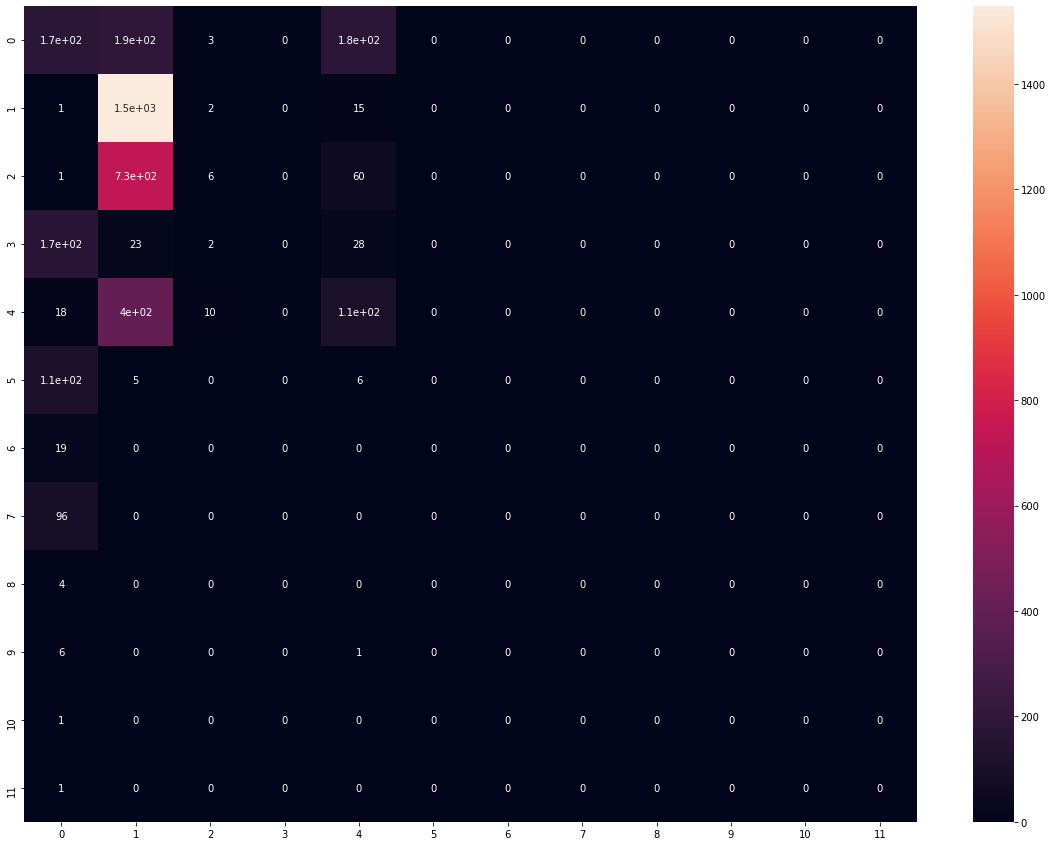

In [22]:
import seaborn as sns

f = plt.figure(figsize=(20,15))
sns.heatmap(metrics.confusion_matrix(expected_cat0_y, predicted_cat0_y),  annot=True)